# Ejercicio 1
Responda las siguientes preguntas
- ### ¿Cómo se puede verificar que una cadena MCMC ha alcanzado su estado estacionario y por qué esto es importante?
    
    Para esto, normalmente se utilizan métodos como la inspección de trazas de las muestras, la prueba de Gelman-Rubin, o el cálculo de la autocorrelación. Este estado es el que se alcanza cuando las distribuciones de las muestras sucesivas no cambian con el tiempo, indicando que la cadena ha convergido a la distribución estacionaria. Esto es importante para asegurar que las muestras son representativas de la distribución que nos interesa, lo que evita sesgos en estimaciones posteriores y asegura que las muestras son válidas para realizar inferencias. (https://www2.cs.arizona.edu/~pachecoj/courses/csc535_fall20/lectures/mcmc.pdf)

- ### ¿En qué situaciones es preferible usar el Muestreador de Gibbs sobre Metropolis-Hastings?
    El muestreador de Gibbs es preferible cuando las distribuciones condicionales de los parámetros son fáciles de muestrear directamente. Es decir, cuando los parámetros de interés tienen distribuciones condicionales conjugadas o simplificadas, lo que facilita el proceso de muestreo y no se tiene que rechazar propuestas. Por otro lado, el Algoritmo de Metropolis-Hastings se usa cuando las condicionales no son fáciles de muestrear directamente y se necesita una distribución de propuesta, esto implica tiempos de convergencia más largos y una tasa de aceptación menor.  Roy, V. (2024). (https://ar5iv.labs.arxiv.org/html/1909.11827)

- ### ¿Cómo afecta la elección de la distribución de propuesta en la eficiencia del Algoritmo de Metropolis-Hasting y cómo afecta la tasa de aceptación de las muestras?
    La elección de la distribución de propuesta en el algoritmo de Metropolis-Hastings afecta directamente su eficiencia y la tasa de aceptación de las muestras. Una distribución de propuesta adecuada facilita una exploración eficiente del espacio de parámetros, lo que puede reducir la autocorrelación entre las muestras y acelerar la convergencia hacia la distribución objetivo. Si la distribución de propuesta es demasiado amplia, las propuestas pueden ser frecuentemente rechazadas, lo que disminuye la tasa de aceptación y ralentiza el muestreo. Por otro lado, una distribución demasiado estrecha puede resultar en una alta tasa de aceptación pero en una exploración ineficiente del espacio, ya que las muestras sucesivas serán muy similares entre sí. Por lo tanto, es esencial seleccionar o adaptar la distribución de propuesta para lograr un equilibrio óptimo entre la tasa de aceptación y la eficiencia del muestreo.
    (https://es.wikipedia.org/wiki/Algoritmo_de_Metropolis-Hastings)


## Ejercicio 2

El objetivo de este ejercicio es implementar el algoritmo de Metropolis-Hastings para aproximar una distribución
normal estándar N(0,1) utilizando una distribución de propuesta uniforme. Luego, se compararán los resultados
obtenidos con la verdadera distribución normal. Para ello considere los siguientes pasos
1. Implementa el Algoritmo de Metropolis-Hastings en Python.
2. Utiliza una distribución de propuesta uniforme en el intervalo [−1,1].
3. Realiza al menos 10,000 iteraciones para obtener suficientes muestras.
4. Compara el histograma de las muestras obtenidas con la verdadera distribución normal N(0,1) usando la
biblioteca matplotlib.

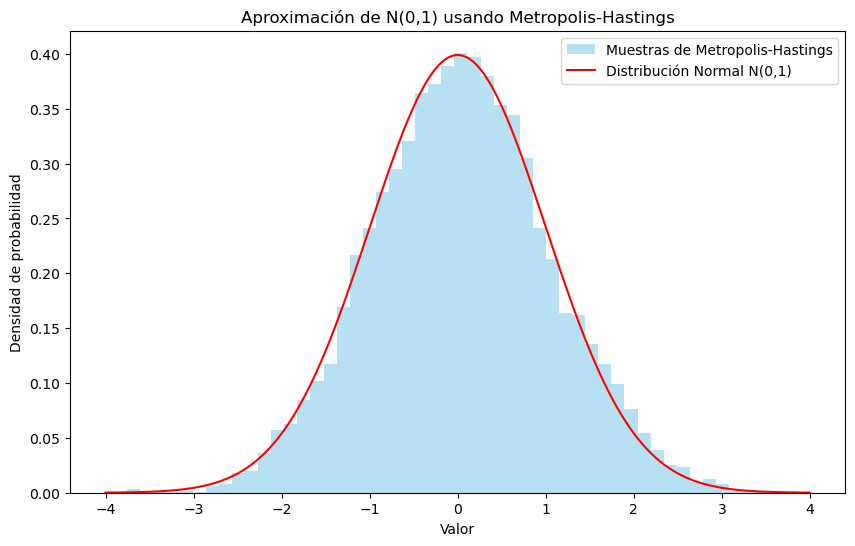

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definimos la distribución objetivo: distribución normal estándar N(0,1)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

# Implementación del algoritmo de Metropolis-Hastings
def metropolis_hastings(target_pdf, proposal_range, num_samples, initial_value):
    samples = [initial_value]
    current_x = initial_value

    for i in range(num_samples):
        # Proponemos un nuevo valor utilizando una distribución uniforme en [current_x - 1, current_x + 1]
        proposed_x = current_x + np.random.uniform(-proposal_range, proposal_range)

        # Calculamos la probabilidad de aceptación
        acceptance_ratio = target_pdf(proposed_x) / target_pdf(current_x)
        acceptance_probability = min(1, acceptance_ratio)

        # Generamos un número aleatorio para decidir si aceptamos la propuesta
        u = np.random.uniform(0, 1)

        if u < acceptance_probability:
            current_x = proposed_x  # Aceptamos la propuesta
        # Si no se acepta, mantenemos el valor actual

        samples.append(current_x)

    return np.array(samples)

# Parámetros
proposal_range = 1  # Rango de la distribución de propuesta uniforme [-1, 1]
num_samples = 10000  # Número de iteraciones
initial_value = 0  # Valor inicial

# Generamos las muestras utilizando el algoritmo de Metropolis-Hastings
samples = metropolis_hastings(target_distribution, proposal_range, num_samples, initial_value)

# Generamos valores para la distribución normal verdadera
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)

# Graficamos el histograma de las muestras y la distribución normal
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Muestras de Metropolis-Hastings')
plt.plot(x, y, 'r', label='Distribución Normal N(0,1)')
plt.title('Aproximación de N(0,1) usando Metropolis-Hastings')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


- a. Analiza el histograma: Compare las muestras obtenidas con la distribución real superpuesta.

En la imagen anterior se muestra la comparación de las muestras obtenidas con la distribución real, y se puede observar que las muestras obtenidas se asemejan a la distribución real, lo que indica que el algoritmo de Metropolis-Hastings ha convergido a la distribución objetivo. En todo el rango de valores, las muestras obtenidas siguen la forma de la distribución normal estándar, lo que sugiere que el algoritmo ha sido efectivo para aproximar la distribución objetivo.

- b. Reflexione sobre los resultados: ¿Qué observas acerca de la convergencia de las muestras hacia la distribución normal?

Se puede observar que las muestras obtenidas convergen hacia la distribución normal a medida que aumenta el número de iteraciones. Esto se refleja en la similitud entre el histograma de las muestras y la distribución normal estándar, lo que indica que el algoritmo de Metropolis-Hastings ha convergido a la distribución objetivo. A medida que se aumenta el número de iteraciones, las muestras se distribuyen de manera más uniforme alrededor de la media cero y la varianza uno, lo que sugiere que el algoritmo ha sido efectivo para aproximar la distribución objetivo.